# Students Flexibility level in Online Education

---



---


---



The effectiveness of online education has shown a number of advantages due to 
increased flexibility and learning opportunities: easy access to experts, exposure to educational environments, a wide range of types of courses, and joining student communities.
Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of Students’ Adaptability Level Prediction in Online Education using Machine Learning Approaches.

---



---



---




# Importing Libraries And Loading the Dataset

---



In [95]:
import pandas as pd #working with relation or labeled data both easily and intuitively
import numpy as np #scientific libray
import seaborn as sns #for making statistical graphics in python
import matplotlib.pyplot as plt  #data visualization and graphical plotting library
%matplotlib inline
import warnings

In [96]:
#reading the data using read csv() function from pandas
data= pd.read_csv('C:/Users/USER/capstone project/students_adaptability_level_online_education.csv')

In [97]:
#This Python package lets you embed Power BI reports in Jupyter notebooks easily
!pip install powerbiclient

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [98]:
#Import Report class and models from the package
from powerbiclient import Report,models

In [99]:
# Import the DeviceCodeLoginAuthentication class to authenticate against Power BI
from powerbiclient.authentication import DeviceCodeLoginAuthentication
# Initiate device authentication
auth_id=DeviceCodeLoginAuthentication()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code S2HB9VCMQ to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [100]:
#Seting the workspace ID and report ID
g_id="a75a46c5-230f-4a12-bb33-0b43184e7727"
r_id="ebab1968-4d2f-4121-b7cf-eb9163bafdca"

In [101]:
#Create an instance of Power BI report and load the report to the output 
report=Report(group_id = g_id, report_id = r_id, auth = auth_id)
report

Report()

# UNDERSTAND THE DATASET

---



In [102]:
#viewing data
data

,Education Level,Institution Type,Age,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,University,Private,23,Moderate,Town,4G,No,Tab,Wifi,Male,Average
1,University,Private,23,Moderate,Town,4G,No,Mobile,Own data,Female,Average
2,College,Public,18,Moderate,Town,4G,No,Mobile,Wifi,Female,Average
3,School,Private,11,Moderate,Town,4G,No,Mobile,Own data,Female,Average
4,School,Private,18,Low,Town,5G,No,Mobile,Own data,Female,Poor
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,18,Low,Town,4G,No,Mobile,Wifi,Female,Average
1201,College,Private,18,Moderate,Rural,4G,No,Mobile,Wifi,Female,Average
1202,School,Private,11,Moderate,Town,5G,No,Mobile,Own data,Male,Average
1203,College,Private,18,Low,Rural,4G,No,Mobile,Wifi,Female,Average


In [103]:
#it used to display data type of each column
data.dtypes

Education Level        object
Institution Type       object
Age                     int64
Flexibility Level      object
Location               object
Network Type           object
IT Student             object
Device                 object
Internet Type          object
Gender                 object
Financial Condition    object
dtype: object

In [104]:
#shape of the data
data.shape

(1205, 11)

In [105]:
# display the top 5 rows of the dataframe
data.head()

,Education Level,Institution Type,Age,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,University,Private,23,Moderate,Town,4G,No,Tab,Wifi,Male,Average
1,University,Private,23,Moderate,Town,4G,No,Mobile,Own data,Female,Average
2,College,Public,18,Moderate,Town,4G,No,Mobile,Wifi,Female,Average
3,School,Private,11,Moderate,Town,4G,No,Mobile,Own data,Female,Average
4,School,Private,18,Low,Town,5G,No,Mobile,Own data,Female,Poor


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Education Level      1205 non-null   object
 1   Institution Type     1205 non-null   object
 2   Age                  1205 non-null   int64 
 3   Flexibility Level    1205 non-null   object
 4   Location             1205 non-null   object
 5   Network Type         1205 non-null   object
 6   IT Student           1205 non-null   object
 7   Device               1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Gender               1205 non-null   object
 10  Financial Condition  1205 non-null   object
dtypes: int64(1), object(10)
memory usage: 103.7+ KB


In [107]:
data.isnull()

,Education Level,Institution Type,Age,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1200,False,False,False,False,False,False,False,False,False,False,False
1201,False,False,False,False,False,False,False,False,False,False,False
1202,False,False,False,False,False,False,False,False,False,False,False
1203,False,False,False,False,False,False,False,False,False,False,False


In [108]:
#Count number of distinct elements in specified axisd
data.nunique()

Education Level        3
Institution Type       2
Age                    6
Flexibility Level      3
Location               2
Network Type           3
IT Student             2
Device                 3
Internet Type          2
Gender                 2
Financial Condition    3
dtype: int64

# Checking the Missing values in the Dataset

---



In [109]:
# Checking for null values in training dataset
missing=pd.DataFrame(data.isnull().sum(),columns=['no.of missing values'])
missing

,no.of missing values
Education Level,0
Institution Type,0
Age,0
Flexibility Level,0
Location,0
Network Type,0
IT Student,0
Device,0
Internet Type,0
Gender,0


# Statistical measures of the data

---




In [110]:
#use to get a descriptive statistics summary of a given dataframe.
data.describe(include="all")

,Education Level,Institution Type,Age,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
count,1205,1205,1205.000000,1205,1205,1205,1205,1205,1205,1205,1205
unique,3,2,NaN,3,2,3,2,3,2,2,3
top,School,Private,NaN,Moderate,Town,4G,No,Mobile,Own data,Male,Average
freq,530,823,NaN,625,935,775,901,1013,695,663,878
mean,NaN,NaN,17.065560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,5.830369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
#it calculates the relationship between each column in your data set
data.corr()

,Age
Age,1.0


# Exploratary data analysis

---




# analysis of the data by constructing a general distribution of features by their number

---






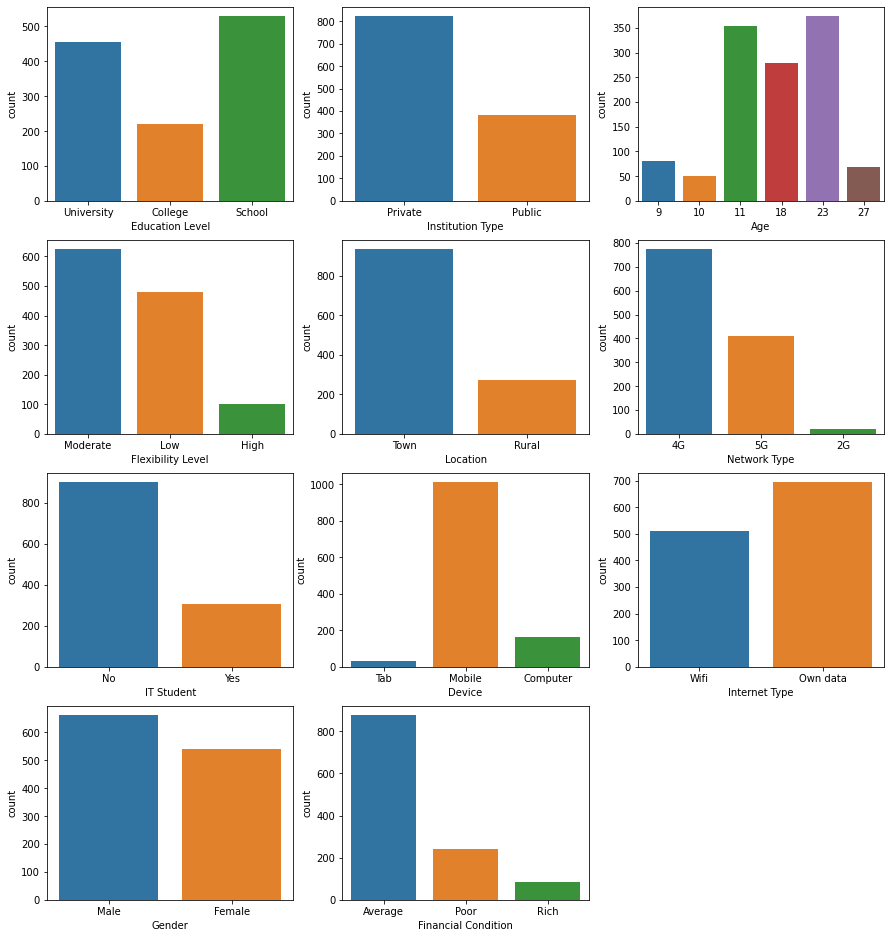

In [112]:
#analysis of the data by constructing a general distribution of features by their numbe
i = 1
plt.figure(figsize = (15,25))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1

# Distribution of the number of students depending on the level of their Flexibility

---





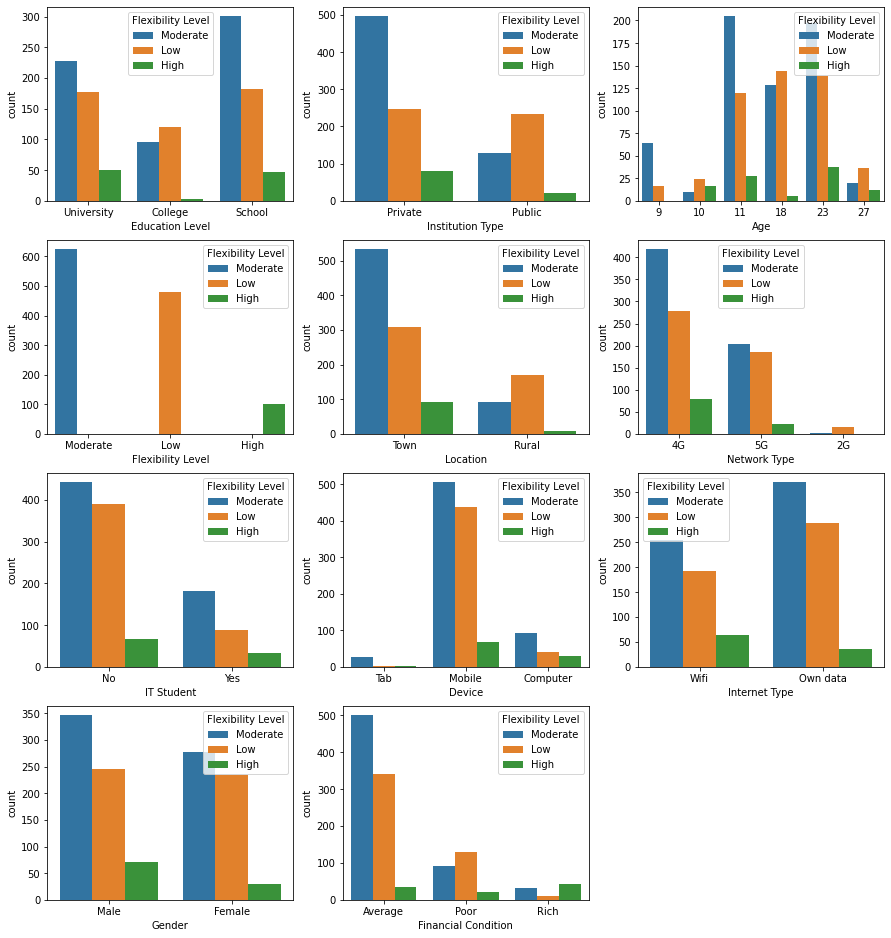

In [113]:
#distribution of the number of students depending on the level of their Flexibility
k = 1
plt.figure(figsize = (15,25))
for feature in data:
    plt.subplot(6,3,k)
    sns.countplot(x=feature ,hue='Flexibility Level', data = data)
    k+=1

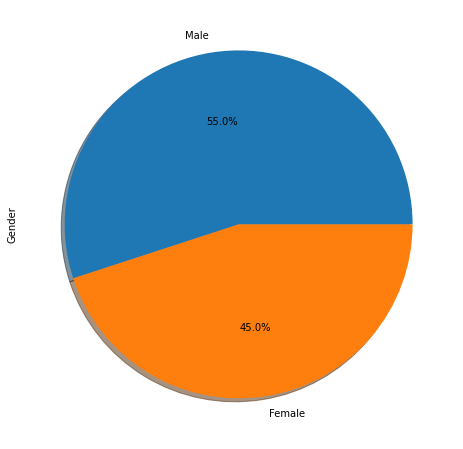

In [114]:
plt.figure(figsize=(12,8))
data['Gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

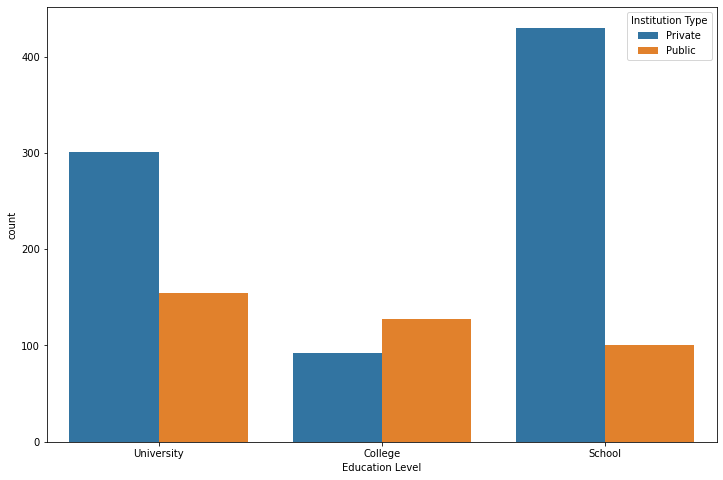

In [115]:
plt.figure(figsize=(12,8))
sns.countplot(data["Education Level"],hue=data["Institution Type"])
plt.show()
warnings.filterwarnings('ignore')

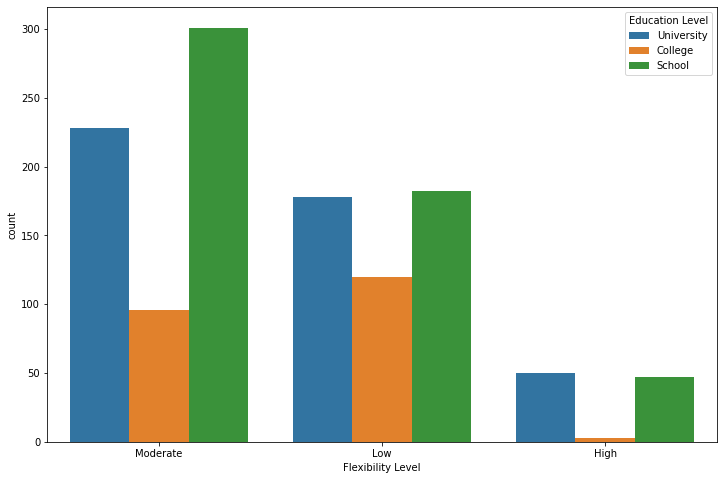

In [116]:
plt.figure(figsize=(12,8))
sns.countplot(data["Flexibility Level"],hue=data["Education Level"])
plt.show()
warnings.filterwarnings('ignore')

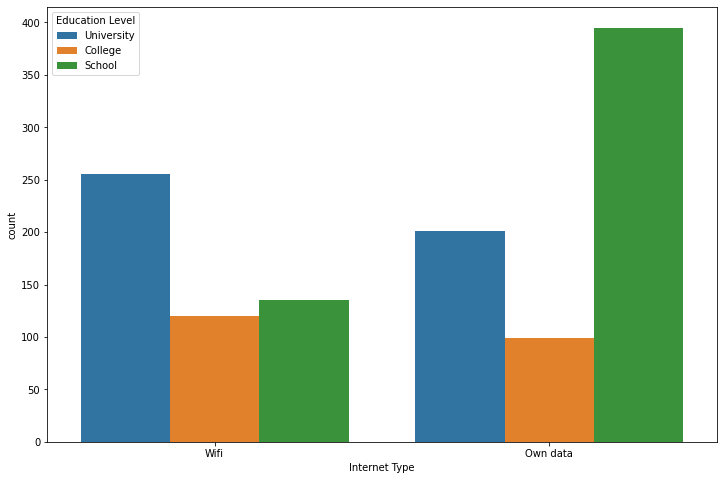

In [117]:
plt.figure(figsize=(12,8))
sns.countplot(data["Internet Type"],hue=data["Education Level"])
plt.show()
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Age'>

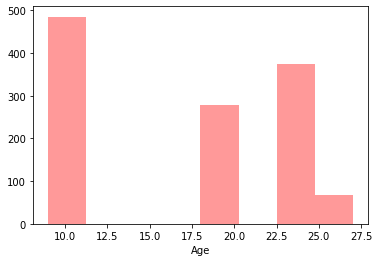

In [118]:
#using distplot we taking the age column and it plots a univariate distribution of observations
sns.distplot(data['Age'],kde = False,color = 'red')

<AxesSubplot:xlabel='Age', ylabel='Density'>

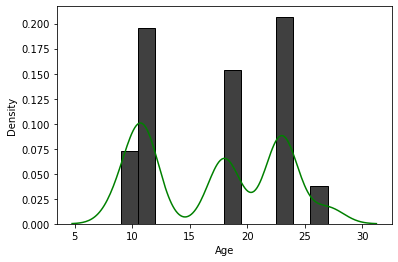

In [119]:
sns.histplot(data["Age"], stat='density',color='black')
sns.kdeplot(data["Age"], color='green')

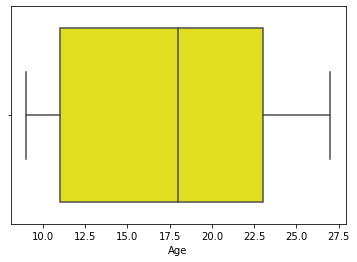

In [120]:
sns.boxplot(data['Age'],color = 'yellow')
warnings.filterwarnings('ignore')

# datatype view

---



In [121]:
#it used to display data type of each column
data.dtypes

Education Level        object
Institution Type       object
Age                     int64
Flexibility Level      object
Location               object
Network Type           object
IT Student             object
Device                 object
Internet Type          object
Gender                 object
Financial Condition    object
dtype: object

# Seperate Numeric AND Non Numerical data columns

---



In [122]:
data_non_numeric_column = data.columns[data.dtypes=='object']

In [123]:
data_numeric_column = data.columns[data.dtypes!='object']

In [124]:
data_non_numeric = data[data_non_numeric_column]

In [125]:
data_numeric = data[data_numeric_column]

In [126]:
data_non_numeric.isna().sum().sort_values(ascending=False)

Education Level        0
Institution Type       0
Flexibility Level      0
Location               0
Network Type           0
IT Student             0
Device                 0
Internet Type          0
Gender                 0
Financial Condition    0
dtype: int64

In [127]:
data_numeric.isna().sum().sort_values(ascending=False)

Age    0
dtype: int64

# Categorical imputation

---



In [128]:
for column in data_non_numeric.columns:
    data_non_numeric[column] = data_non_numeric[column].astype('category')

In [129]:
data_non_numeric.head()

,Education Level,Institution Type,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,University,Private,Moderate,Town,4G,No,Tab,Wifi,Male,Average
1,University,Private,Moderate,Town,4G,No,Mobile,Own data,Female,Average
2,College,Public,Moderate,Town,4G,No,Mobile,Wifi,Female,Average
3,School,Private,Moderate,Town,4G,No,Mobile,Own data,Female,Average
4,School,Private,Low,Town,5G,No,Mobile,Own data,Female,Poor


# We find that the columns that had numeric values were actually categoric but are coded with numeric values. Hence we need to convert them into categoric

---

In [130]:
data_numeric = data_numeric.astype('category')

In [131]:
data_numeric.head()

,Age
0,23
1,23
2,18
3,11
4,18


In [132]:
data_numeric['Age'].value_counts()

23    374
11    353
18    278
9      81
27     68
10     51
Name: Age, dtype: int64

In [133]:
data_non_numeric

,Education Level,Institution Type,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,University,Private,Moderate,Town,4G,No,Tab,Wifi,Male,Average
1,University,Private,Moderate,Town,4G,No,Mobile,Own data,Female,Average
2,College,Public,Moderate,Town,4G,No,Mobile,Wifi,Female,Average
3,School,Private,Moderate,Town,4G,No,Mobile,Own data,Female,Average
4,School,Private,Low,Town,5G,No,Mobile,Own data,Female,Poor
...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Low,Town,4G,No,Mobile,Wifi,Female,Average
1201,College,Private,Moderate,Rural,4G,No,Mobile,Wifi,Female,Average
1202,School,Private,Moderate,Town,5G,No,Mobile,Own data,Male,Average
1203,College,Private,Low,Rural,4G,No,Mobile,Wifi,Female,Average


In [134]:
data_non_numeric.columns

Index(['Education Level', 'Institution Type', 'Flexibility Level', 'Location',
       'Network Type', 'IT Student', 'Device', 'Internet Type', 'Gender',
       'Financial Condition'],
      dtype='object')

In [135]:
data_numeric.columns

Index(['Age'], dtype='object')

In [136]:
data_non_numeric.dtypes

Education Level        category
Institution Type       category
Flexibility Level      category
Location               category
Network Type           category
IT Student             category
Device                 category
Internet Type          category
Gender                 category
Financial Condition    category
dtype: object

In [137]:
data_numeric.dtypes

Age    category
dtype: object

In [138]:
#it encode categorical values into  Numerical values
data_non_numeric['Education Level'] = data_non_numeric['Education Level'].cat.codes

data_non_numeric['Institution Type'] =data_non_numeric['Institution Type'].cat.codes

data_non_numeric['Flexibility Level']=data_non_numeric['Flexibility Level'].cat.codes

data_non_numeric['Location']=data_non_numeric['Location'].cat.codes

data_non_numeric['Network Type']=data_non_numeric['Network Type'].cat.codes

data_non_numeric['IT Student']=data_non_numeric['IT Student'].cat.codes

data_non_numeric['Device']=data_non_numeric['Device'].cat.codes

data_non_numeric['Internet Type']=data_non_numeric['Internet Type'].cat.codes

data_non_numeric['Gender'] = data_non_numeric['Gender'].cat.codes

data_non_numeric['Financial Condition'] = data_non_numeric['Financial Condition'].cat.codes


In [139]:
data_non_numeric = pd.DataFrame(data_non_numeric)
data_non_numeric

,Education Level,Institution Type,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition
0,2,0,2,1,1,0,2,1,1,0
1,2,0,2,1,1,0,1,0,0,0
2,0,1,2,1,1,0,1,1,0,0
3,1,0,2,1,1,0,1,0,0,0
4,1,0,1,1,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1200,0,0,1,1,1,0,1,1,0,0
1201,0,0,2,0,1,0,1,1,0,0
1202,1,0,2,1,2,0,1,0,1,0
1203,0,0,1,0,1,0,1,1,0,0


In [140]:
data_numeric = pd.DataFrame(data_numeric)
data_numeric

,Age
0,23
1,23
2,18
3,11
4,18
...,...
1200,18
1201,18
1202,11
1203,18


In [141]:
df= pd.concat([data_non_numeric,data_numeric],
                       join='outer',
                      axis=1)
df.head()

,Education Level,Institution Type,Flexibility Level,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition,Age
0,2,0,2,1,1,0,2,1,1,0,23
1,2,0,2,1,1,0,1,0,0,0,23
2,0,1,2,1,1,0,1,1,0,0,18
3,1,0,2,1,1,0,1,0,0,0,11
4,1,0,1,1,2,0,1,0,0,1,18


# Splitting the Data to Train and Test

---



In [142]:
x= df.drop('Flexibility Level',axis=1)
y= df['Flexibility Level']

In [143]:
x.head()

,Education Level,Institution Type,Location,Network Type,IT Student,Device,Internet Type,Gender,Financial Condition,Age
0,2,0,1,1,0,2,1,1,0,23
1,2,0,1,1,0,1,0,0,0,23
2,0,1,1,1,0,1,1,0,0,18
3,1,0,1,1,0,1,0,0,0,11
4,1,0,1,2,0,1,0,0,1,18


In [144]:
y.head(20)

0     2
1     2
2     2
3     2
4     1
5     1
6     1
7     2
8     1
9     2
10    1
11    1
12    2
13    1
14    2
15    1
16    1
17    1
18    1
19    2
Name: Flexibility Level, dtype: int8

In [145]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state=42)

# Training model1(DecisionTree Classifier  Algorithm)

---



In [146]:
from sklearn.tree import DecisionTreeClassifier
model1= DecisionTreeClassifier()

In [147]:
model1.fit(x_train ,y_train)

DecisionTreeClassifier()

In [148]:
model1.feature_importances_

array([0.1348403 , 0.0868278 , 0.11101128, 0.1224587 , 0.04541157,
       0.04581565, 0.04927403, 0.09441016, 0.13833486, 0.17161563])

In [149]:
x_train.columns

Index(['Education Level', 'Institution Type', 'Location', 'Network Type',
       'IT Student', 'Device', 'Internet Type', 'Gender',
       'Financial Condition', 'Age'],
      dtype='object')

In [150]:
y_pred=model1.predict(x_test)

***Accuracy score for DecisionTree Classifier Algorithm***





In [151]:
from sklearn.metrics import accuracy_score
ac_DecisionTree=accuracy_score(y_test,y_pred)
print(ac_DecisionTree)

0.8245033112582781


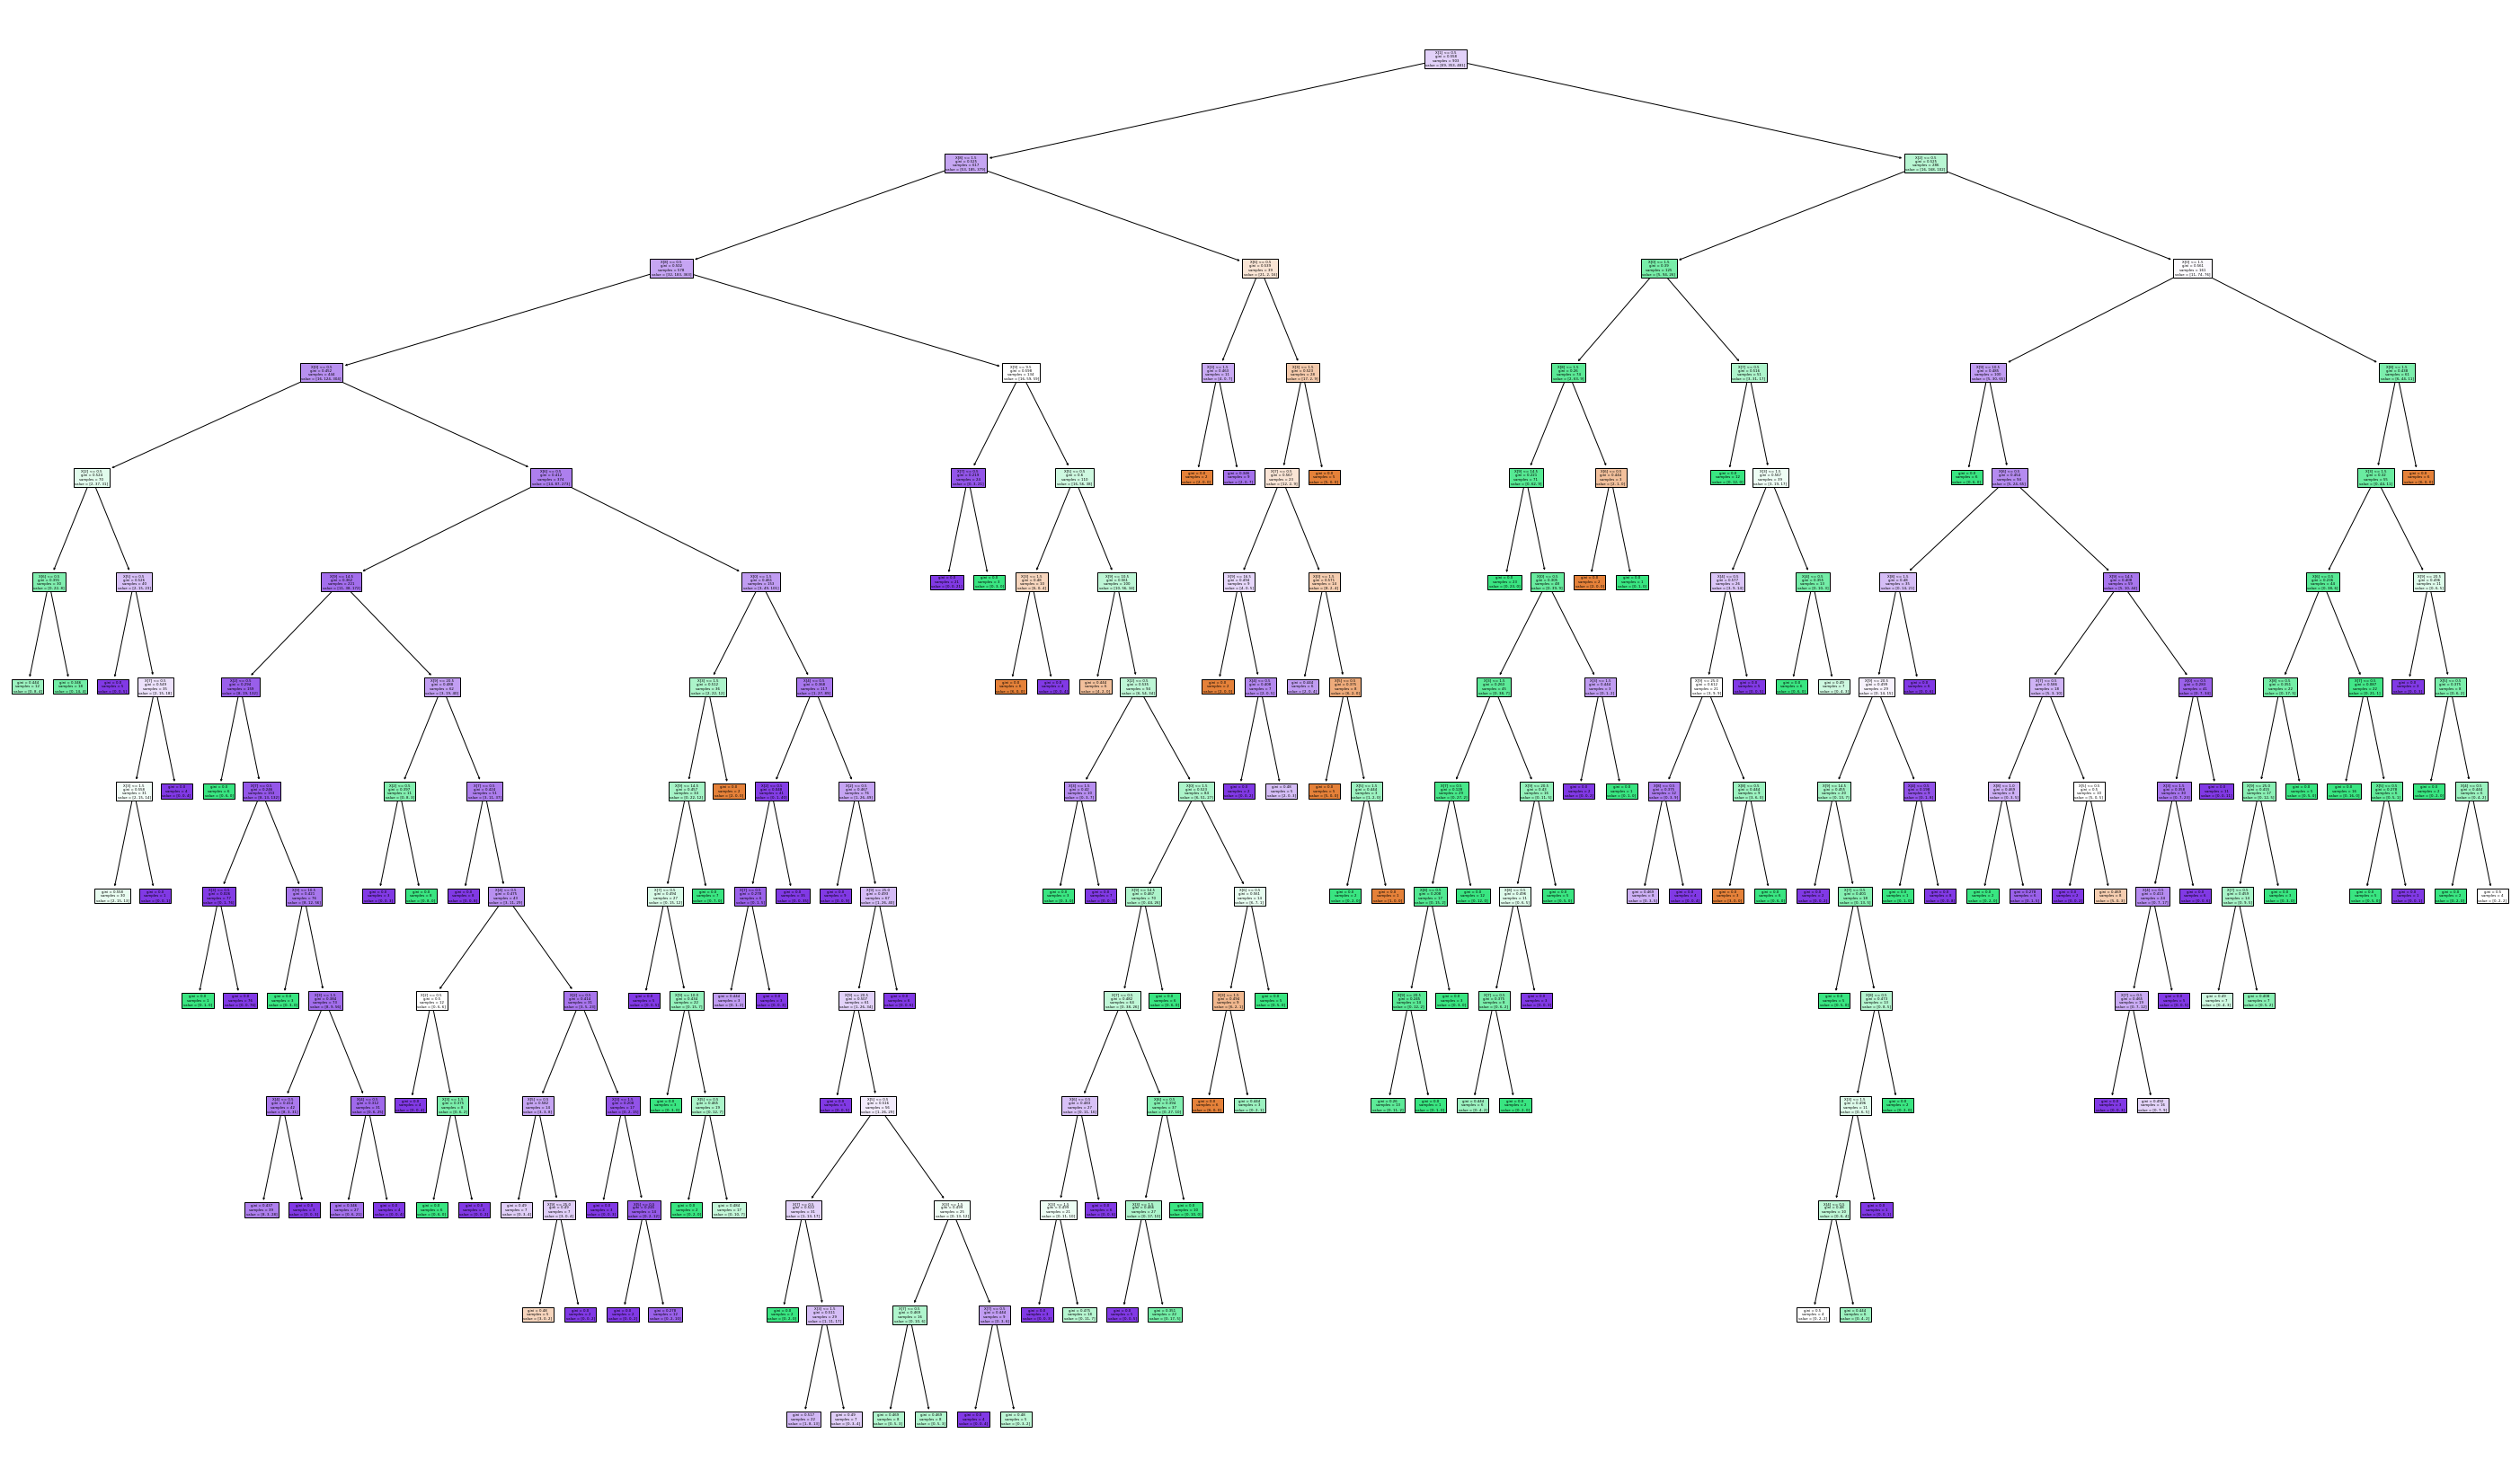

In [152]:
from sklearn import tree
plt.figure(figsize=(50,30))
tree.plot_tree(model1,filled=True)
warnings.filterwarnings('ignore')

# Applying Hyperparameter Tuning
---



In [153]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [154]:
from sklearn.model_selection import GridSearchCV
grid_search_dt= GridSearchCV(estimator=model1,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =2, verbose=1)

In [155]:
grid_search_dt.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [156]:
best_parameters_dt= grid_search_dt.best_params_
print(best_parameters_dt)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


**After using GridsearchCV in the decision tree classifier we are getting the best accuracy score**

In [157]:
grid_search_dt.best_score_

0.7984530386740332

In [158]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 25, min_samples_leaf= 1, min_samples_split= 2, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25)

In [159]:
ac_clf= clf.score(x_test ,y_test)
ac_clf

0.8245033112582781

***Confusion matrix for DecisionTree Classifier Algorithm***

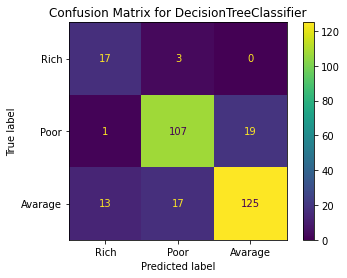

In [160]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(model1.predict(x_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Rich","Poor","Avarage"])
disp.plot()
plt.title("Confusion Matrix for DecisionTreeClassifier")
plt.show()

***Classification repot for DecisionTree Classifier Algorithm***

In [161]:
from sklearn.metrics import classification_report
cr_DecisionTree=classification_report(y_test,y_pred)
print(cr_DecisionTree)

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        31
           1       0.84      0.84      0.84       127
           2       0.81      0.87      0.84       144

    accuracy                           0.82       302
   macro avg       0.83      0.75      0.78       302
weighted avg       0.83      0.82      0.82       302



# Training model2(Randomforest classifier Algorithm)

---







In [162]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier()

In [163]:
model2.fit(x_train ,y_train)

RandomForestClassifier()

In [164]:
model2.feature_importances_y_pred=model2.predict(x_test)

***Accuracy score for Randomforest classifier Algorithm***

In [165]:
from sklearn.metrics import accuracy_score
ac_RandomForest=accuracy_score(y_test,y_pred)
print(ac_RandomForest)

0.8245033112582781


# Applying Hyperparameter Tuning

---



In [166]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [167]:
grid_search_rfc = GridSearchCV(estimator=model2, param_grid=param_grid, cv= 5)
grid_search_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [168]:
best_parameters_rfc= grid_search_rfc.best_params_
print(best_parameters_rfc)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


**After using GridsearchCV in the RandomForest classifier we are getting the best accuracy score**

In [169]:
grid_search_rfc.best_score_

0.7851688152240639

In [170]:
clf2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
clf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

In [171]:
ac_clf2= clf2.score(x_test ,y_test)
ac_clf2

0.8211920529801324

***Confusion Matrix for Randomforest classifier Algorithm***

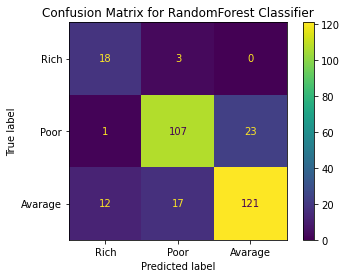

In [172]:
cm_RandomForest= confusion_matrix(model2.predict(x_test),y_test)
disp = ConfusionMatrixDisplay(cm_RandomForest, display_labels=["Rich","Poor","Avarage"])
disp.plot()
plt.title("Confusion Matrix for RandomForest Classifier")
plt.show()

***Classification report for Randomforest classifier Algorithm***

In [173]:
from sklearn.metrics import classification_report
cr_RandomForest=classification_report(y_test,y_pred)
print(cr_RandomForest)

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        31
           1       0.84      0.84      0.84       127
           2       0.81      0.87      0.84       144

    accuracy                           0.82       302
   macro avg       0.83      0.75      0.78       302
weighted avg       0.83      0.82      0.82       302



# Training model3(KNeighbors Classifier Algorithm)

---



In [174]:

from sklearn.neighbors import KNeighborsClassifier
model3=classifier=KNeighborsClassifier()

In [175]:
model3.fit(x_train ,y_train)

KNeighborsClassifier()

In [176]:
y_pred=model3.predict(x_test)

***Accuracy score for KNeighbors Classifier Algorithm***

In [177]:
from sklearn.metrics import accuracy_score
ac_KNeighbors=accuracy_score(y_test,y_pred)
print(ac_KNeighbors)

0.7185430463576159


# Applying Hyperparameter Tuning

---



In [178]:
param_grid = dict(n_neighbors=list(range(1, 31)))

In [179]:
# defining parameter range
grid_search_knn= GridSearchCV(model3, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [180]:
# fitting the model for grid search
grid_search_knn.fit(x_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy', verbose=1)

In [181]:
best_parameters_knn= grid_search_knn.best_params_
print(best_parameters_knn)

{'n_neighbors': 1}


**After using GridsearchCV in the KNeighbors classifier we are getting the best accuracy score**

In [182]:
grid_search_knn.best_score_

0.7797435897435897

In [183]:
clf3=RandomForestClassifier(random_state=42)
clf3.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [184]:
ac_clf3= clf3.score(x_test ,y_test)
ac_clf3

0.8079470198675497

***Confusion matrix for KNeighbors Classifier Algorithm***

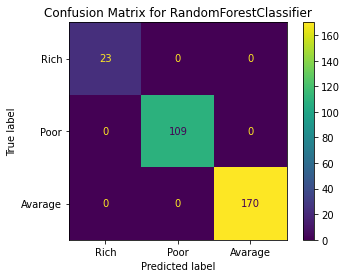

In [185]:
cm_KNeighbors= confusion_matrix(model3.predict(x_test),y_pred)
disp = ConfusionMatrixDisplay(cm_KNeighbors, display_labels=["Rich","Poor","Avarage"])
disp.plot()
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()

***Classification report for KNeighbors Classifier Algorithm***

In [186]:
from sklearn.metrics import classification_report
cr_KNeighbors=classification_report(y_test,y_pred)
print(cr_KNeighbors)

              precision    recall  f1-score   support

           0       0.70      0.52      0.59        31
           1       0.76      0.65      0.70       127
           2       0.69      0.82      0.75       144

    accuracy                           0.72       302
   macro avg       0.72      0.66      0.68       302
weighted avg       0.72      0.72      0.72       302



# Comparison of all 3 models accuracy

---



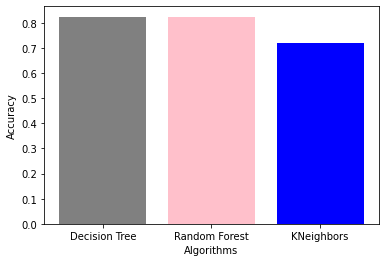

In [187]:
plt.bar(['Decision Tree','Random Forest','KNeighbors'],[ac_DecisionTree,ac_RandomForest,ac_KNeighbors],color=['gray','pink','blue'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

# Comparison of all 3 models grid search best score
---



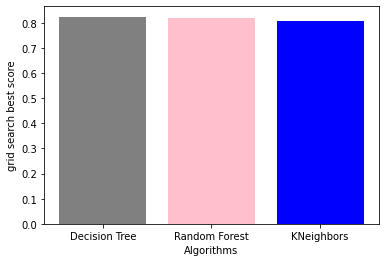

In [188]:
plt.bar(['Decision Tree','Random Forest','KNeighbors'],[ac_clf,ac_clf2,ac_clf3],color=['gray','pink','blue'])
plt.xlabel("Algorithms")
plt.ylabel("grid search best score")
plt.show()